In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import load_iris

# Configuração de estilo
plt.style.use('default')
sns.set_palette("husl")

print(" Exemplo Clássico: Árvore de Decisão - Dataset Iris")
print("=" * 60)

 Exemplo Clássico: Árvore de Decisão - Dataset Iris


In [ ]:
# Carregar dataset clássico Iris
iris = load_iris()
X = iris.data  # Features: comprimento/largura de sépala e pétala
y = iris.target  # Target: espécies de iris

#  Nomes das features e classes
feature_names = iris.feature_names
class_names = iris.target_names

#  Criar DataFrame para melhor visualização
df = pd.DataFrame(X, columns=feature_names)
df['species'] = y
df['species_name'] = [class_names[i] for i in y]

print(" Dataset Iris - Primeiras 10 amostras:")
print(df.head(10))

print(f"\n Dimensões do dataset: {X.shape}")
print(f"Classes: {class_names}")
print(f" Features: {feature_names}")

# 📊 Estatísticas descritivas
print("\n Estatísticas Descritivas:")
print(df[feature_names].describe())

 Dataset Iris - Primeiras 10 amostras:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   
5                5.4               3.9                1.7               0.4   
6                4.6               3.4                1.4               0.3   
7                5.0               3.4                1.5               0.2   
8                4.4               2.9                1.4               0.2   
9                4.9               3.1                1.5               0.1   

   species species_name  
0        0       setosa  
1        0       setosa  
2        0   

/tmp/ipython-input-1755702096.py:16: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


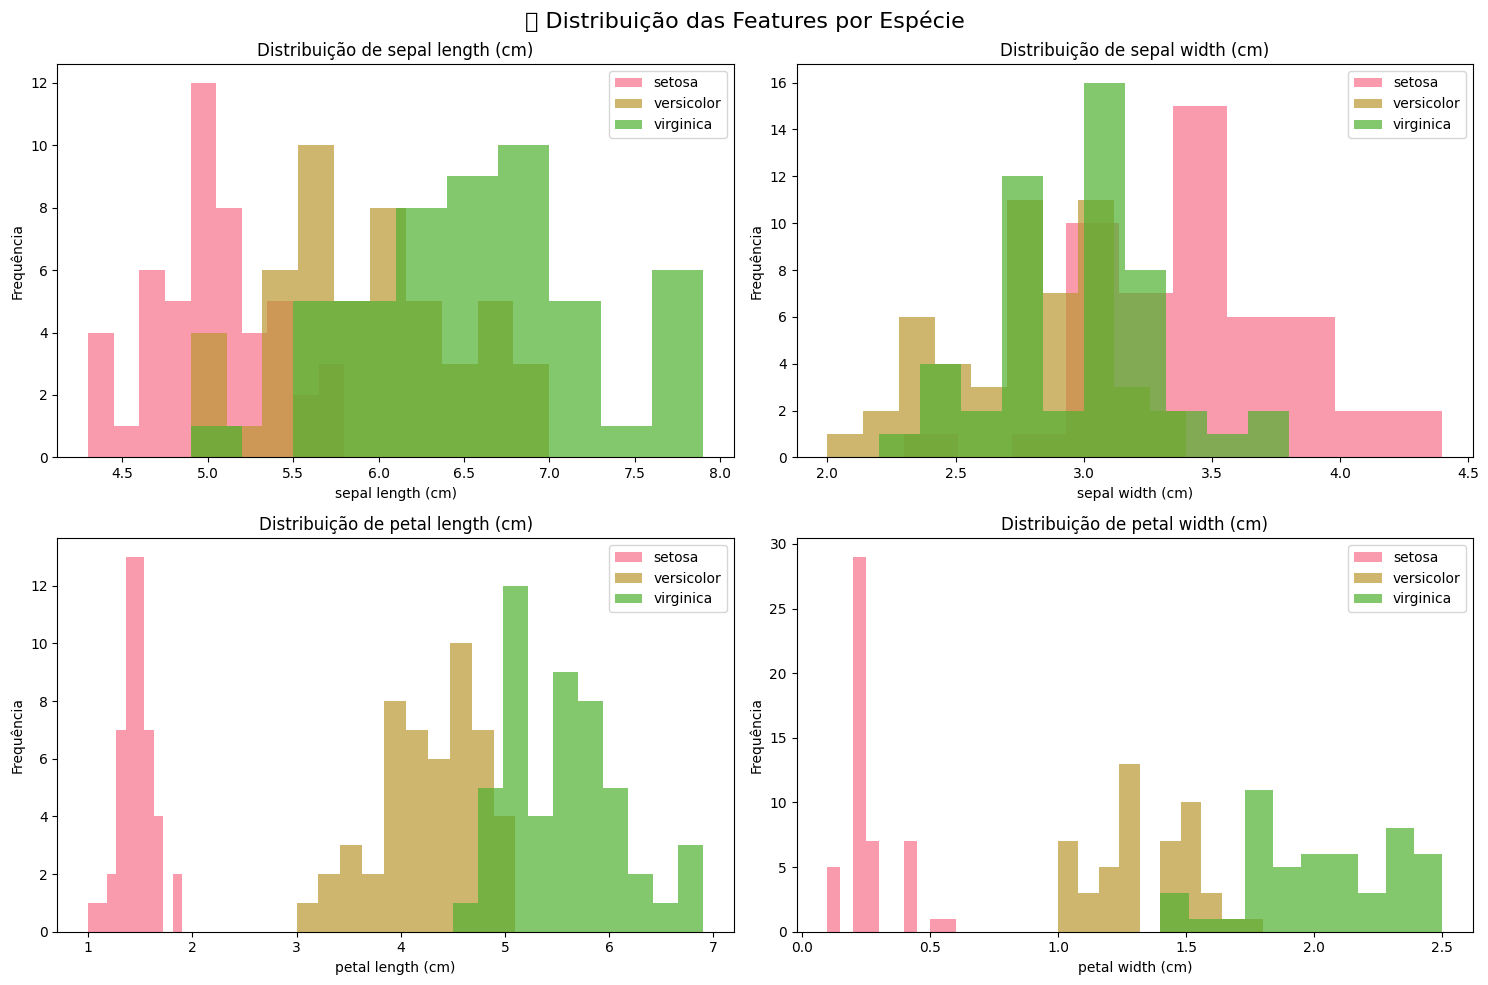

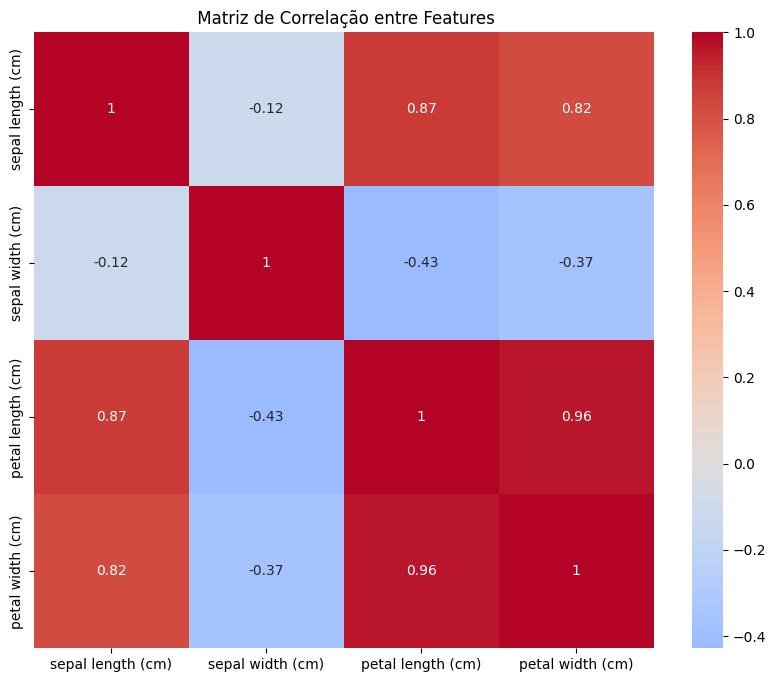

In [ ]:
# Visualização das features por espécie
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Distribuição das Features por Espécie', fontsize=16)

features = feature_names
for i, feature in enumerate(features):
    row, col = i // 2, i % 2
    for species in range(3):
        species_data = df[df['species'] == species][feature]
        axes[row, col].hist(species_data, alpha=0.7, label=class_names[species])
    axes[row, col].set_title(f'Distribuição de {feature}')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Frequência')
    axes[row, col].legend()

plt.tight_layout()
plt.show()

# Matriz de correlação
plt.figure(figsize=(10, 8))
correlation_matrix = df[feature_names].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title(' Matriz de Correlação entre Features')
plt.show()

In [ ]:
#  Dividir dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y  # Manter proporção das classes
)

print(" Divisão dos Dados:")
print(f" Treino: {X_train.shape[0]} amostras")
print(f" Teste: {X_test.shape[0]} amostras")
print(f" Distribuição das classes no treino: {np.bincount(y_train)}")
print(f" Distribuição das classes no teste: {np.bincount(y_test)}")

 Divisão dos Dados:
 Treino: 105 amostras
 Teste: 45 amostras
 Distribuição das classes no treino: [35 35 35]
 Distribuição das classes no teste: [15 15 15]


In [ ]:
#  Criar e treinar o modelo de árvore de decisão
arvore = DecisionTreeClassifier(
    random_state=42,
    max_depth=3,  # Limitando profundidade para evitar overfitting
    min_samples_split=5,
    min_samples_leaf=2
)

print(" Treinando a árvore de decisão...")
arvore.fit(X_train, y_train)

print(" Modelo treinado com sucesso!")
print(f" Profundidade da árvore: {arvore.get_depth()}")
print(f" Número de folhas: {arvore.get_n_leaves()}")

 Treinando a árvore de decisão...
 Modelo treinado com sucesso!
 Profundidade da árvore: 3
 Número de folhas: 5


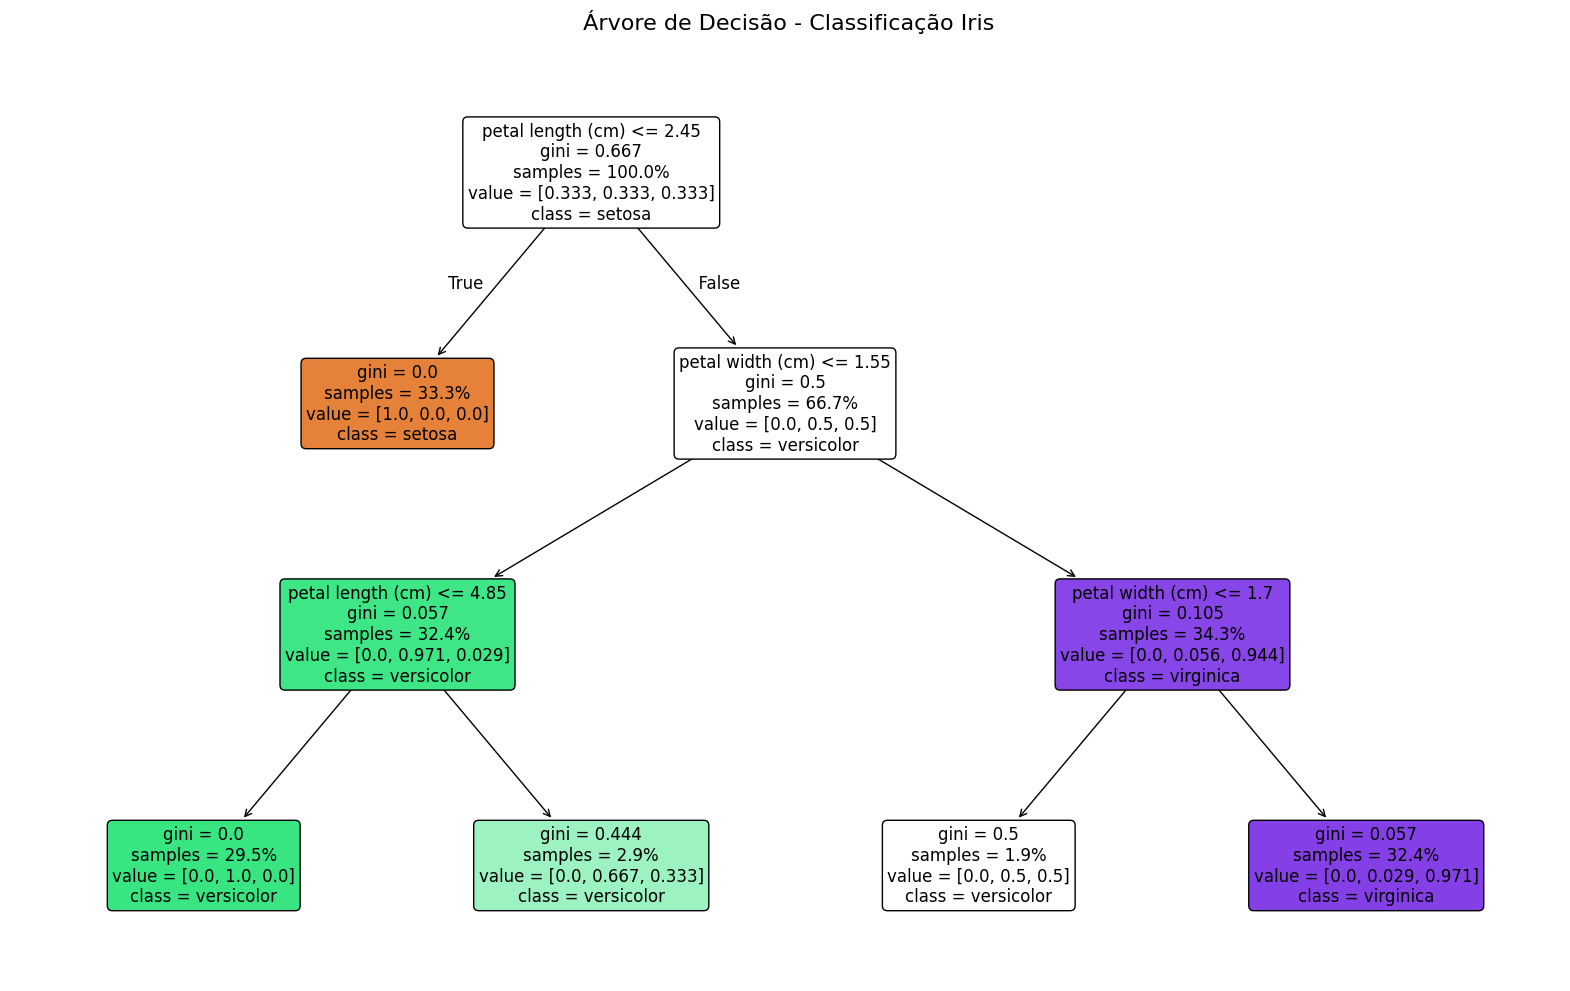


Importância das Features:
             Feature  Importance
2  petal length (cm)    0.541766
3   petal width (cm)    0.458234
1   sepal width (cm)    0.000000
0  sepal length (cm)    0.000000


/tmp/ipython-input-1512630535.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='viridis')
/tmp/ipython-input-1512630535.py:30: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


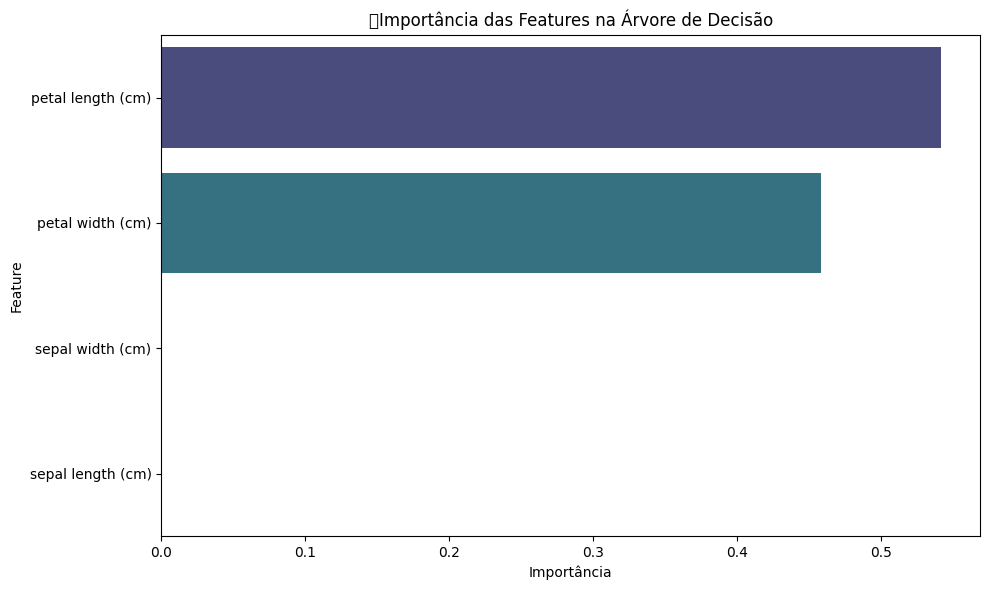

In [ ]:
#  Visualizar a árvore de decisão
plt.figure(figsize=(20, 12))
plot_tree(
    arvore,
    feature_names=feature_names,
    class_names=class_names,
    filled=True,
    rounded=True,
    fontsize=12,
    proportion=True
)
plt.title(' Árvore de Decisão - Classificação Iris', fontsize=16, pad=20)
plt.show()

# Feature Importance
importances = arvore.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values('Importance', ascending=False)

print("\nImportância das Features:")
print(feature_importance_df)

#  Gráfico de importância
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('📈Importância das Features na Árvore de Decisão')
plt.xlabel('Importância')
plt.tight_layout()
plt.show()

 Avaliação do Modelo:
Acurácia: 0.9333 (93.33%)

 Relatório de Classificação:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      0.93      0.90        15
   virginica       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



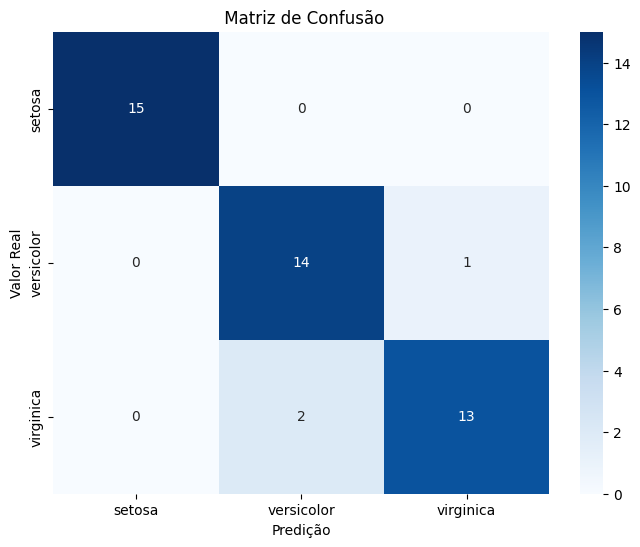

In [ ]:
#  Fazer previsões
y_pred = arvore.predict(X_test)
y_pred_proba = arvore.predict_proba(X_test)

print(" Avaliação do Modelo:")
print("=" * 50)

#  Acurácia
acuracia = accuracy_score(y_test, y_pred)
print(f"Acurácia: {acuracia:.4f} ({acuracia*100:.2f}%)")

#  Relatório de classificação detalhado
print("\n Relatório de Classificação:")
print(classification_report(y_test, y_pred, target_names=class_names))

#  Matriz de confusão
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title(' Matriz de Confusão')
plt.ylabel('Valor Real')
plt.xlabel('Predição')
plt.show()

In [ ]:
#  Verificar overfitting
train_accuracy = accuracy_score(y_train, arvore.predict(X_train))
test_accuracy = accuracy_score(y_test, y_pred)

print(" Análise de Overfitting:")
print("=" * 40)
print(f" Acurácia no Treino: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
print(f" Acurácia no Teste:  {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

if train_accuracy - test_accuracy > 0.1:
    print(" POSSÍVEL OVERFITTING: Diferença grande entre treino e teste")
else:
    print(" MODELO GENERALIZANDO BEM: Performance similar em treino e teste")

 Análise de Overfitting:
 Acurácia no Treino: 0.9714 (97.14%)
 Acurácia no Teste:  0.9333 (93.33%)
 MODELO GENERALIZANDO BEM: Performance similar em treino e teste


In [ ]:
# Fazer predição para uma nova amostra
nova_amostra = np.array([[5.1, 3.5, 1.4, 0.2]])  # Exemplo de medidas

predicao = arvore.predict(nova_amostra)[0]
probabilidades = arvore.predict_proba(nova_amostra)[0]

print("\n Predição para Nova Amostra:")
print("=" * 40)
print(f" Features: {nova_amostra[0]}")
print(f" Espécie Predita: {class_names[predicao]}")
print(f" Probabilidades:")
for i, prob in enumerate(probabilidades):
    print(f"   {class_names[i]}: {prob:.4f} ({prob*100:.2f}%)")


 Predição para Nova Amostra:
 Features: [5.1 3.5 1.4 0.2]
 Espécie Predita: setosa
 Probabilidades:
   setosa: 1.0000 (100.00%)
   versicolor: 0.0000 (0.00%)
   virginica: 0.0000 (0.00%)



⚡ Comparação de Diferentes Configurações:
                  Configuração  Profundidade  Folhas  Acurácia Treino  Acurácia Teste
     Árvore Rasa (max_depth=2)             2       3         0.971429        0.888889
    Árvore Média (max_depth=4)             4       7         0.990476        0.888889
Árvore Profunda (max_depth=10)             5       8         1.000000        0.933333
               Árvore Restrita             3       5         0.971429        0.888889


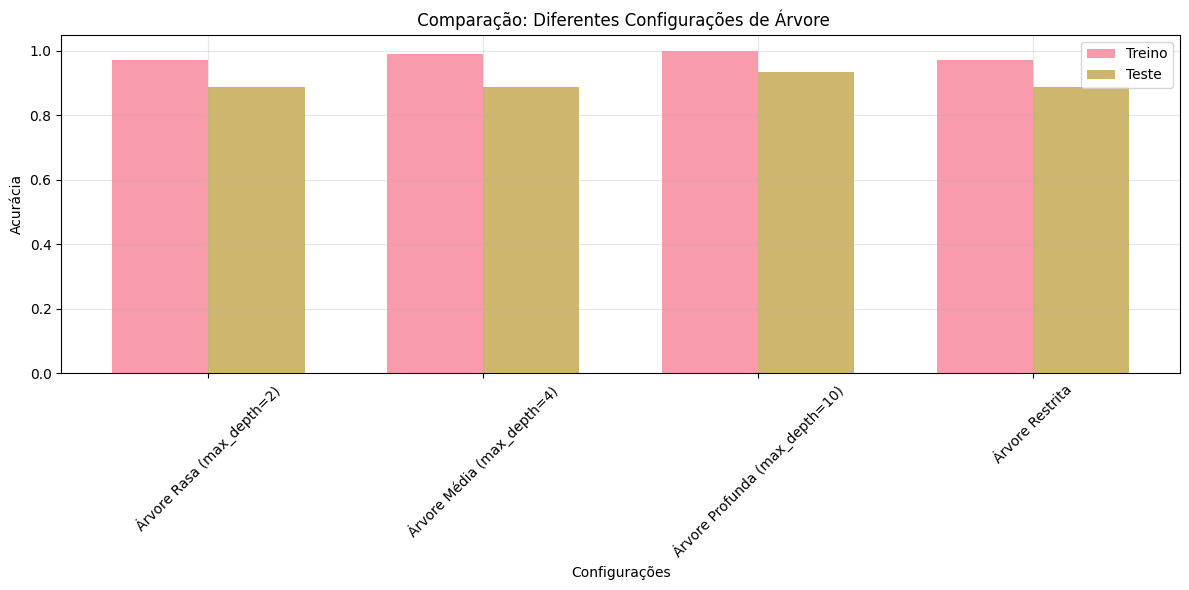

In [ ]:
#  Testar diferentes configurações de árvore
configuracoes = {
    'Árvore Rasa (max_depth=2)': DecisionTreeClassifier(max_depth=2, random_state=42),
    'Árvore Média (max_depth=4)': DecisionTreeClassifier(max_depth=4, random_state=42),
    'Árvore Profunda (max_depth=10)': DecisionTreeClassifier(max_depth=10, random_state=42),
    'Árvore Restrita': DecisionTreeClassifier(
        max_depth=3,
        min_samples_split=10,
        min_samples_leaf=5,
        random_state=42
    )
}

print("\n Comparação de Diferentes Configurações:")
print("=" * 55)

resultados = []
for nome, modelo in configuracoes.items():
    modelo.fit(X_train, y_train)
    train_acc = accuracy_score(y_train, modelo.predict(X_train))
    test_acc = accuracy_score(y_test, modelo.predict(X_test))

    resultados.append({
        'Configuração': nome,
        'Profundidade': modelo.get_depth(),
        'Folhas': modelo.get_n_leaves(),
        'Acurácia Treino': train_acc,
        'Acurácia Teste': test_acc
    })

#  Tabela comparativa
resultados_df = pd.DataFrame(resultados)
print(resultados_df.to_string(index=False))

#  Gráfico comparativo
plt.figure(figsize=(12, 6))
x_pos = np.arange(len(resultados_df))
width = 0.35

plt.bar(x_pos - width/2, resultados_df['Acurácia Treino'], width, label='Treino', alpha=0.7)
plt.bar(x_pos + width/2, resultados_df['Acurácia Teste'], width, label='Teste', alpha=0.7)

plt.xlabel('Configurações')
plt.ylabel('Acurácia')
plt.title(' Comparação: Diferentes Configurações de Árvore')
plt.xticks(x_pos, resultados_df['Configuração'], rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
print("\n PRINCIPAIS INSIGHTS:")
print("=" * 40)
print(" Árvores de decisão são interpretáveis e visuais")
print(" Feature importance ajuda a entender decisões")
print(" Controle de profundidade previne overfitting")
print(" Dataset Iris é separável com poucas decisões")
print(f" Feature mais importante: {feature_importance_df.iloc[0]['Feature']}")
print(" Modelo generaliza bem para novas amostras")

print("\n PRÓXIMOS PASSOS SUGERIDOS:")
print("- Experimentar com Random Forest")
#- Testar diferentes critérios (Gini vs Entropia)
#- Aplicar em dataset mais complexo
#- Explorar técnicas de poda (pruning)


 PRINCIPAIS INSIGHTS:
 Árvores de decisão são interpretáveis e visuais
 Feature importance ajuda a entender decisões
 Controle de profundidade previne overfitting
 Dataset Iris é separável com poucas decisões
 Feature mais importante: petal length (cm)
 Modelo generaliza bem para novas amostras

 PRÓXIMOS PASSOS SUGERIDOS:
- Experimentar com Random Forest


         Clima Temperatura Umidade  Vento Jogar
0   Ensolarado      Quente    Alta  Fraco   Não
1   Ensolarado      Quente    Alta  Forte   Não
2      Nublado      Quente    Alta  Fraco   Sim
3      Chuvoso       Ameno    Alta  Fraco   Sim
4      Chuvoso        Frio  Normal  Fraco   Sim
5      Chuvoso        Frio  Normal  Forte   Não
6      Nublado        Frio  Normal  Forte   Sim
7   Ensolarado       Ameno    Alta  Fraco   Não
8   Ensolarado        Frio  Normal  Fraco   Sim
9      Chuvoso       Ameno  Normal  Fraco   Sim
10  Ensolarado       Ameno  Normal  Forte   Sim
11     Nublado       Ameno    Alta  Forte   Sim
12     Nublado      Quente  Normal  Fraco   Sim
13     Chuvoso       Ameno    Alta  Forte   Não
Entropia inicial: 0.94
Ganho de Informação (Clima): 0.247
Ganho de Informação (Temperatura): 0.029
Ganho de Informação (Umidade): 0.152
Ganho de Informação (Vento): 0.048


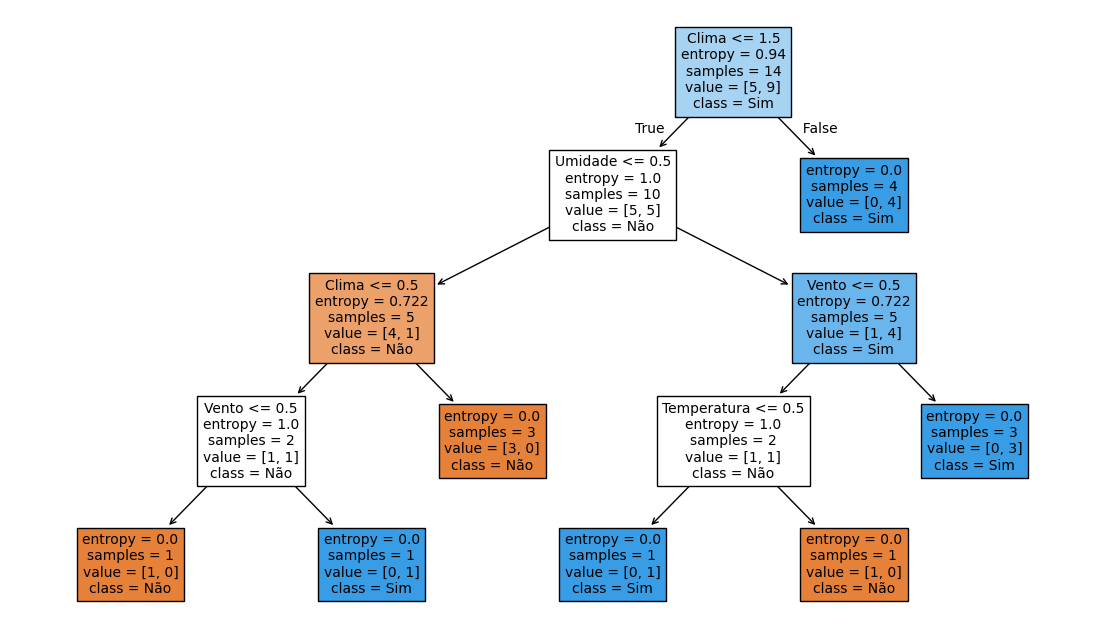

In [ ]:
###Exemplo Jogar Tênis
import pandas as pd
import numpy as np
from math import log2
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# ----------------------------
# 1. Dataset Jogar Tênis
# ----------------------------
data = {
    'Clima': [
        'Ensolarado', 'Ensolarado', 'Nublado', 'Chuvoso', 'Chuvoso', 'Chuvoso',
        'Nublado', 'Ensolarado', 'Ensolarado', 'Chuvoso', 'Ensolarado', 'Nublado', 'Nublado', 'Chuvoso'
    ],
    'Temperatura': [
        'Quente', 'Quente', 'Quente', 'Ameno', 'Frio', 'Frio',
        'Frio', 'Ameno', 'Frio', 'Ameno', 'Ameno', 'Ameno', 'Quente', 'Ameno'
    ],
    'Umidade': [
        'Alta', 'Alta', 'Alta', 'Alta', 'Normal', 'Normal',
        'Normal', 'Alta', 'Normal', 'Normal', 'Normal', 'Alta', 'Normal', 'Alta'
    ],
    'Vento': [
        'Fraco', 'Forte', 'Fraco', 'Fraco', 'Fraco', 'Forte',
        'Forte', 'Fraco', 'Fraco', 'Fraco', 'Forte', 'Forte', 'Fraco', 'Forte'
    ],
    'Jogar': [
        'Não', 'Não', 'Sim', 'Sim', 'Sim', 'Não',
        'Sim', 'Não', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Não'
    ]
}

df = pd.DataFrame(data)
print(df)

# ----------------------------
# 2. Funções para cálculo de entropia e ganho de informação
# ----------------------------
def entropia(col):
    valores, contagens = np.unique(col, return_counts=True)
    probs = contagens / contagens.sum()
    return -sum(p * log2(p) for p in probs)

# Entropia inicial
target_entropy = entropia(df['Jogar'])
print("Entropia inicial:", round(target_entropy, 3))

# Função para ganho de informação
def ganho_informacao(df, atributo, alvo='Jogar'):
    valores, contagens = np.unique(df[atributo], return_counts=True)
    entropia_condicional = 0
    for v, c in zip(valores, contagens):
        subset = df[df[atributo] == v]
        entropia_condicional += (c/len(df)) * entropia(subset[alvo])
    return target_entropy - entropia_condicional

for atributo in ['Clima', 'Temperatura', 'Umidade', 'Vento']:
    print(f"Ganho de Informação ({atributo}):", round(ganho_informacao(df, atributo), 3))

# ----------------------------
# 3. Construção da árvore com sklearn
# ----------------------------
X = df.drop('Jogar', axis=1)
y = df['Jogar']

# Codificar variáveis categóricas (cada coluna separadamente)
X_encoded = X.apply(LabelEncoder().fit_transform)
y_encoded = LabelEncoder().fit_transform(y)

# Treinar árvore de decisão
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(X_encoded, y_encoded)

# ----------------------------
# 4. Visualização da árvore
# ----------------------------
plt.figure(figsize=(14,8))
plot_tree(clf, feature_names=X.columns, class_names=['Não', 'Sim'], filled=True, fontsize=10)
plt.show()

         Clima Temperatura Umidade  Vento Jogar
0   Ensolarado      Quente    Alta  Fraco   Não
1   Ensolarado      Quente    Alta  Forte   Não
2      Nublado      Quente    Alta  Fraco   Sim
3      Chuvoso       Ameno    Alta  Fraco   Sim
4      Chuvoso        Frio  Normal  Fraco   Sim
5      Chuvoso        Frio  Normal  Forte   Não
6      Nublado        Frio  Normal  Forte   Sim
7   Ensolarado       Ameno    Alta  Fraco   Não
8   Ensolarado        Frio  Normal  Fraco   Sim
9      Chuvoso       Ameno  Normal  Fraco   Sim
10  Ensolarado       Ameno  Normal  Forte   Sim
11     Nublado       Ameno    Alta  Forte   Sim
12     Nublado      Quente  Normal  Fraco   Sim
13     Chuvoso       Ameno    Alta  Forte   Não
Índice de Gini inicial: 0.459
Redução de Gini (Clima): 0.116
Redução de Gini (Temperatura): 0.019
Redução de Gini (Umidade): 0.092
Redução de Gini (Vento): 0.031


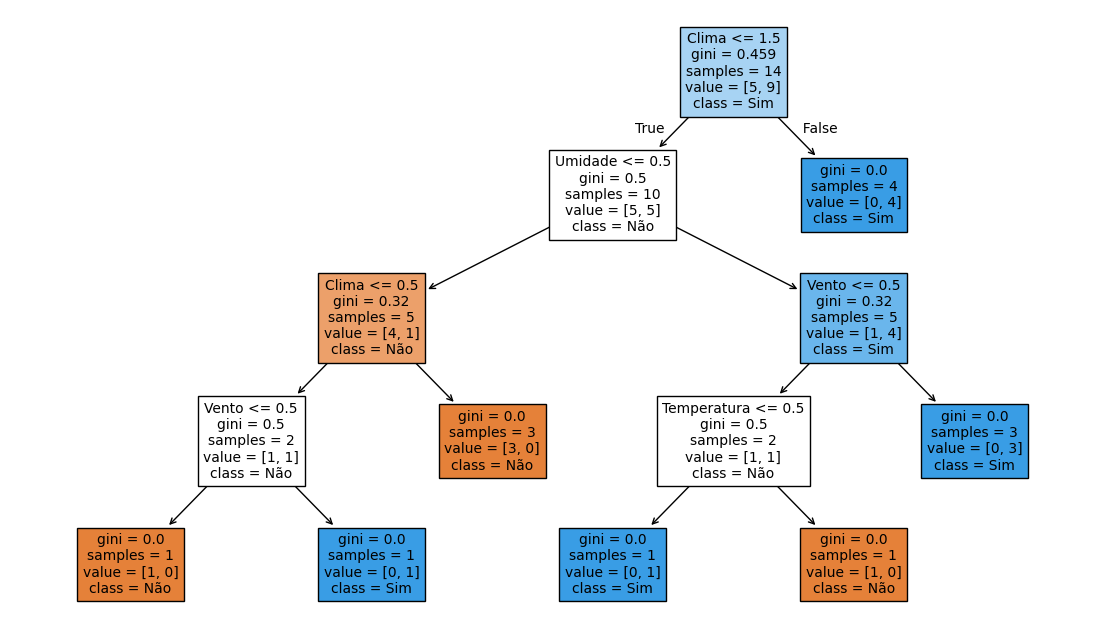

In [ ]:
#GINI
import pandas as pd
import numpy as np
from math import log2
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# ----------------------------
# 1. Dataset Jogar Tênis
# ----------------------------
data = {
    'Clima': [
        'Ensolarado', 'Ensolarado', 'Nublado', 'Chuvoso', 'Chuvoso', 'Chuvoso',
        'Nublado', 'Ensolarado', 'Ensolarado', 'Chuvoso', 'Ensolarado', 'Nublado', 'Nublado', 'Chuvoso'
    ],
    'Temperatura': [
        'Quente', 'Quente', 'Quente', 'Ameno', 'Frio', 'Frio',
        'Frio', 'Ameno', 'Frio', 'Ameno', 'Ameno', 'Ameno', 'Quente', 'Ameno'
    ],
    'Umidade': [
        'Alta', 'Alta', 'Alta', 'Alta', 'Normal', 'Normal',
        'Normal', 'Alta', 'Normal', 'Normal', 'Normal', 'Alta', 'Normal', 'Alta'
    ],
    'Vento': [
        'Fraco', 'Forte', 'Fraco', 'Fraco', 'Fraco', 'Forte',
        'Forte', 'Fraco', 'Fraco', 'Fraco', 'Forte', 'Forte', 'Fraco', 'Forte'
    ],
    'Jogar': [
        'Não', 'Não', 'Sim', 'Sim', 'Sim', 'Não',
        'Sim', 'Não', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Não'
    ]
}

df = pd.DataFrame(data)
print(df)

# ----------------------------
# 2. Funções para cálculo de Gini
# ----------------------------
def gini(col):
    valores, contagens = np.unique(col, return_counts=True)
    probs = contagens / contagens.sum()
    return 1 - sum(p**2 for p in probs)

# Gini inicial
target_gini = gini(df['Jogar'])
print("Índice de Gini inicial:", round(target_gini, 3))

# Função para redução de Gini (similar ao ganho de informação)
def ganho_gini(df, atributo, alvo='Jogar'):
    valores, contagens = np.unique(df[atributo], return_counts=True)
    gini_condicional = 0
    for v, c in zip(valores, contagens):
        subset = df[df[atributo] == v]
        gini_condicional += (c/len(df)) * gini(subset[alvo])
    return target_gini - gini_condicional

for atributo in ['Clima', 'Temperatura', 'Umidade', 'Vento']:
    print(f"Redução de Gini ({atributo}):", round(ganho_gini(df, atributo), 3))

# ----------------------------
# 3. Construção da árvore com sklearn (Gini)
# ----------------------------
X = df.drop('Jogar', axis=1)
y = df['Jogar']

# Codificar variáveis categóricas (cada coluna separadamente)
X_encoded = X.apply(LabelEncoder().fit_transform)
y_encoded = LabelEncoder().fit_transform(y)

# Treinar árvore de decisão usando Gini
clf = DecisionTreeClassifier(criterion='gini', random_state=42)
clf.fit(X_encoded, y_encoded)

# ----------------------------
# 4. Visualização da árvore
# ----------------------------
plt.figure(figsize=(14,8))
plot_tree(clf, feature_names=X.columns, class_names=['Não', 'Sim'], filled=True, fontsize=10)
plt.show()
